In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
cart = pd.read_excel("Toyota.xlsx")

In [3]:
cart.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
cart.shape

(1436, 38)

In [5]:
cart=cart.copy(deep=True)

In [59]:
cart.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.110880,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.317251,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.157875,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.040047,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.166161,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333913,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.110880,0.317251,-0.157875,-0.040047,0.166161,-0.333913,1.000000,0.059263,0.012967,0.036326,...,0.250942,0.266459,0.048975,0.020697,0.210234,-0.006064,0.011320,0.206492,0.019619,0.067843
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.059263,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.012967,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.036326,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [7]:
cart.size

54568

In [8]:
cart.select_dtypes(exclude=[object])

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,90.0,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,90.0,1,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90.0,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,90.0,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,90.0,0,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,86.0,1,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,1998,19000,86.0,0,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,1998,17016,86.0,0,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,1998,16916,86.0,1,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [9]:
sns.set(style = "darkgrid")

<AxesSubplot:xlabel='KM', ylabel='Price'>

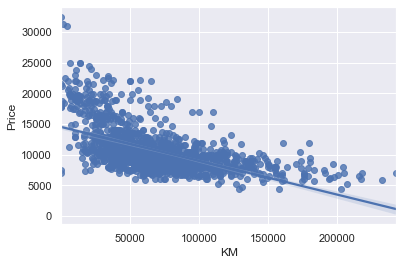

In [57]:
sns.regplot(x=cart["KM"],y=cart["Price"],fit_reg= True)

In [17]:
car1=cart.drop(cart.columns.difference(["Price","Age_08_04","KM","HP","cc","Quarterly_Tax"]), axis=1)

In [19]:
car1.head()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax
0,13500,23,46986,90.0,2000,210
1,13750,23,72937,90.0,2000,210
2,13950,24,41711,90.0,2000,210
3,14950,26,48000,90.0,2000,210
4,13750,30,38500,90.0,2000,210


In [20]:
car1.size

8616

In [21]:
car1.corr()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax
Price,1.000000,-0.876590,-0.569960,0.317251,0.126389,0.219197
Age_08_04,-0.876590,1.000000,0.505672,-0.157875,-0.098084,-0.198431
KM,-0.569960,0.505672,1.000000,-0.333913,0.102683,0.278165
HP,0.317251,-0.157875,-0.333913,1.000000,0.036326,-0.297842
cc,0.126389,-0.098084,0.102683,0.036326,1.000000,0.306996
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.297842,0.306996,1.000000


In [58]:
car1.shape

(1436, 6)

In [22]:
car1.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               2
cc               0
Quarterly_Tax    0
dtype: int64

In [25]:
car2 = car1.dropna()

In [27]:
car2.size

8604

In [28]:
car2.corr()

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax
Price,1.000000,-0.876362,-0.570735,0.317251,0.125624,0.215895
Age_08_04,-0.876362,1.000000,0.505705,-0.157875,-0.097650,-0.196427
KM,-0.570735,0.505705,1.000000,-0.333913,0.102303,0.278718
HP,0.317251,-0.157875,-0.333913,1.000000,0.036326,-0.297842
cc,0.125624,-0.097650,0.102303,0.036326,1.000000,0.305982
Quarterly_Tax,0.215895,-0.196427,0.278718,-0.297842,0.305982,1.000000


In [29]:
car2.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Quarterly_Tax    0
dtype: int64

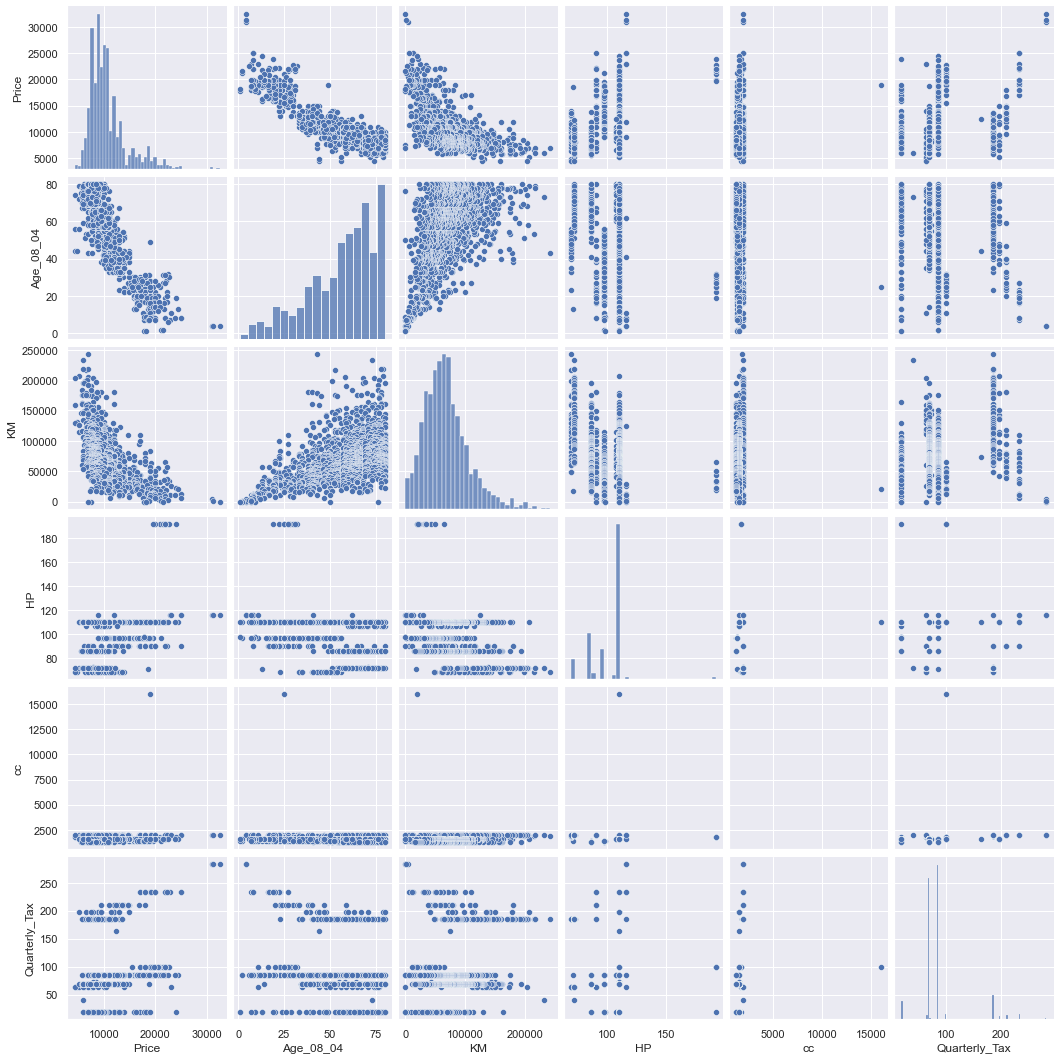

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(car2)

In [32]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax',data=car2).fit()

In [34]:
model.params

Intercept        13388.448203
Age_08_04         -137.290358
KM                  -0.019630
HP                  46.753893
cc                   0.111959
Quarterly_Tax       16.570846
dtype: float64

In [36]:
print(model.tvalues, '\n', model.pvalues)

Intercept        34.605440
Age_08_04       -51.757719
KM              -14.435460
HP               16.403091
cc                1.155535
Quarterly_Tax    14.407543
dtype: float64 
 Intercept        4.455056e-191
Age_08_04         0.000000e+00
KM                3.405067e-44
HP                1.565718e-55
cc                2.480645e-01
Quarterly_Tax     4.847043e-44
dtype: float64


In [42]:
print(model.rsquared,model.rsquared_adj,model.aic)

0.01578143294390144 0.015094129475286877 27551.624577223512


In [43]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

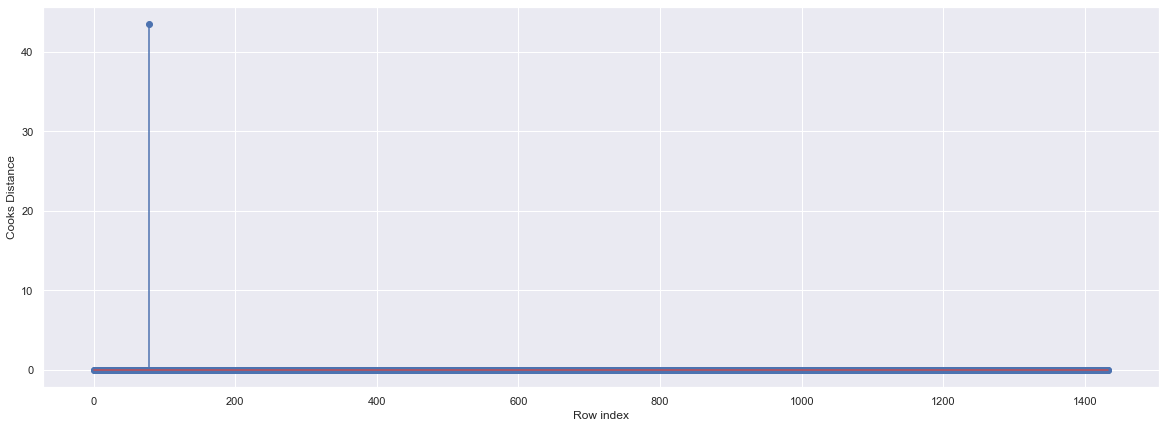

In [48]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(car2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
(np.argmax(c),np.max(c))

(78, 43.451490496928876)

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     1579.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        02:20:58   Log-Likelihood:                -12440.
No. Observations:                1434   AIC:                         2.489e+04
Df Residuals:                    1428   BIC:                         2.492e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.503e+04    504.013     49.659      0.000     2.4e+04     2.6e+04
np.log(Age_08_04) -4965.8524     91.680    -54.165      0.000   -5145.695   -4786.010
KM                   -0.0208      0.001    -16.031      0.000      -0.023      -0.018
HP                   48.1782      2.764     17.434      0.000      42.757      53.599
cc                    0.1484      0.094      1.579      0.115      -0.036       0.333
Quarterly_Tax        17.5560      1.107     15.863      0.000      15.385      19.727
==============================================================================
Omnibus:                      344.012   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6370.273
Skew:                          -0.618   Prob(JB):                         0.00
Kurtosis:                      13.251   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""